<a href="https://colab.research.google.com/github/AlejandroGuedez/Equipo-23-de-Diplomado-data-scientist/blob/Versiones/NoSupervizado_Gr23_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis No Supervisado
### Grupo 23

**Integrantes:** Franco Amilcar Genolet (francogeno97@gmail.com), Fabian Alejandro Zapata Cerutti (fzc501@gmail.com), Luis Alejandro Guedez Gomez (luis.guedez@dicsys.com), María Laura Mantovani (mantovanimlaura@gmail.com).

###Práctico entregable: 

Utilizar la base de jugadores “players_22.csv” disponible en la [página de Kaggle](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset). Considerar que la base 2022 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019. Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio de la base. **FRANCO**

2- Evaluación visual  e intuitiva de a dos variables numéricas por vez. **FRANCO**

3- Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros. **DBSCAN:LAU, DBSCAN:ALE**

4- Evaluación y Análisis de los clusters encontrados.** ALE-LAU-FRANCO**

5- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué? **FABIAN**

6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering. **FABIAN**

## 1.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Exploración-de-la-base

In [3]:
df=pd.read_csv("players_22.csv")
df.head(2)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png


In [4]:
df.tail(4)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,70,445.0,Derry City,Rep. Ireland Airtricity League,1.0,RES,27.0,NaN,2021-02-22,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,193000.0,NaN,NaN,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,...,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,NaN,45+2,45+2,45+2,47,46,46,46,47,47+2,47+2,47+2,49+2,47+2,47+2,47+2,49+2,49+2,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,72,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,31.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,175000.0,NaN,NaN,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,...,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN,45+2,45+2,45+2,46,46,46,46,46,47+2,47+2,47+2,48+2,47+2,47+2,47+2,48+2,47+2,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,66,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,12.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,239000.0,NaN,NaN,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,...,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN,47+2,47+2,47+2,47,47,47,47,47,45+2,45+2,45+2,45+2,39+2,39+2,39+2,45+2,33+2,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,2002-02-06,167,61,113040.0,NorthEast United FC,Indian Super League,1.0,SUB,13.0,NaN,2021-08-31,2025.0,159,India,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-),No,217000.0,NaN,NaN,68.0,38.0,45.0,48.0,36.0,48.0,39,32,46,50,37,48,38,...,57,40,36,55,42,47,46,35,36,33,31,37,8,13,13,9,14,NaN,45+2,45+2,45+2,47,47,47,47,47,47+2,47+2,47+2,48+2,46+2,46+2,46+2,48+2,45+2,44+2,44+2,44+2,45+2,45+2,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.p

In [5]:
print(df.columns)
print(len(df.columns), 'variables')

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
110 variables


In [6]:
print(df.describe())

           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863

tipos de variables:

In [7]:
# da error 'DataFrame' object has no attribute 'Crossing' validar luego 

# print(df.Crossing.max()-df.Crossing.min()+1)
# nbins=89
# print(df['Crossing'].unique())
# df['Crossing'].hist(bins = nbins)

In [8]:
print(df.overall)

0        93
1        92
2        91
3        91
4        91
         ..
19234    47
19235    47
19236    47
19237    47
19238    47
Name: overall, Length: 19239, dtype: int64


**Realizamos el histograma de la variable "Overall" (Desempeño global)**

47


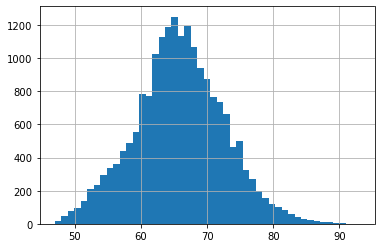

In [9]:
nbins=1*(df.overall.max()-df.overall.min())+1
df['overall'].hist(bins = nbins)
print(nbins)

La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings), utilizando redondeo

La variable 'Overall' es numérica discreta, (pero de "naturaleza" continua) así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100, más allá del tipo de dato en estos casos.
       
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'. 

Mejores jugadores por posición:

In [10]:
df.head(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [11]:
best_players_per_position=df.iloc[df.groupby(df['club_position'])['overall'].idxmax()][['club_position','long_name','overall']]
best_players_per_position.sort_values(by=['overall'], ascending=False)

,club_position,long_name,overall
0,RW,Lionel Andrés Messi Cuccittini,93
1,ST,Robert Lewandowski,92
3,LW,Neymar da Silva Santos Júnior,91
4,RCM,Kevin De Bruyne,91
5,GK,Jan Oblak,91
14,CDM,Carlos Henrique Venancio Casimiro,89
11,CF,Karim Benzema,89
15,LCB,Virgil van Dijk,89
19,RDM,Joshua Walter Kimmich,89
23,RS,Luis Alberto Suárez Díaz,88


Conteos por posiciones

In [12]:
pd.DataFrame(df.club_position.value_counts()).sort_values(by=['club_position'], ascending=False)

,club_position
SUB,8299
RES,3168
RCB,701
GK,701
LCB,701
RB,515
LB,515
ST,476
RCM,470
LCM,470


Mejores Promedios de Overall por equipos

In [13]:
# club_avg_overall=df.groupby("Club")["Overall"].mean().reset_index().sort_values("Overall",ascending=False)
# club_avg_overall.head(8)

In [14]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [15]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sofifa_id,0,0.000000,0,0.0,19239,int64
1,player_url,0,0.000000,0,0.0,19239,object
2,short_name,0,0.000000,0,0.0,18145,object
3,long_name,0,0.000000,0,0.0,19219,object
4,player_positions,0,0.000000,0,0.0,674,object
5,overall,0,0.000000,0,0.0,47,int64
6,potential,0,0.000000,0,0.0,46,int64
7,value_eur,74,0.003846,0,0.0,252,float64
8,wage_eur,61,0.003171,0,0.0,133,float64
9,age,0,0.000000,0,0.0,29,int64


## 2.-Preparación-de-los-datos-a analizar

**Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("Overall"),**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [16]:
df_filter_overall = df[(df['overall']>70)]
df_filter_overall.head(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


### Tomamos solo los skills, las diferentes posiciones y el id para validar mas adelante valores faltantes

In [17]:
skills_ratings = ['sofifa_id','club_position','pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing',
'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power',
'power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
'mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving',
'goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed']

print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

df_skills = df_filter_overall[skills_ratings]

df_skills.rename(columns={'club_position': 'position'}, inplace=True)
# df_skills = df_skills.columns.str.replace('club_position', 'position')

43 variables numéricas de desempeño según habilidad


In [18]:
df_skills

,sofifa_id,position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,RW,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,188545,ST,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,20801,ST,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,190871,LW,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,192985,RCM,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,261987,RES,61.0,56.0,67.0,66.0,62.0,58.0,46,55,49,75,37,65,56,65,73,70,63,59,61,68,57,52,61,69,53,64,58,69,67,75,60,73,60,70,46,11,7,13,12,9,NaN
4589,262411,SUB,67.0,64.0,70.0,72.0,68.0,79.0,66,60,62,73,58,73,73,63,70,70,69,66,74,69,65,73,67,81,77,65,83,70,68,70,66,74,61,74,69,11,8,8,15,8,NaN
4590,262815,RB,81.0,51.0,66.0,70.0,66.0,67.0,70,61,49,71,29,71,74,35,69,72,80,82,67,58,65,45,69,73,70,40,50,64,65,59,40,70,68,70,67,12,12,11,15,9,NaN
4591,263230,SUB,76.0,70.0,60.0,65.0,39.0,71.0,64,74,72,63,58,66,56,49,57,65,79,74,55,70,75,74,68,65,74,63,70,30,73,59,63,59,35,38,34,14,15,14,12,8,NaN


### Verificamos los valores nulos por cada columna para verificar como solucionar estos valores nulos

In [19]:
status(df_skills)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sofifa_id,0,0.000000,0,0.0,4593,int64
1,position,25,0.005443,0,0.0,29,object
2,pace,444,0.096669,0,0.0,69,float64
3,shooting,444,0.096669,0,0.0,74,float64
4,passing,444,0.096669,0,0.0,56,float64
5,dribbling,444,0.096669,0,0.0,56,float64
6,defending,444,0.096669,0,0.0,73,float64
7,physic,444,0.096669,0,0.0,54,float64
8,attacking_crossing,0,0.000000,0,0.0,88,int64
9,attacking_finishing,0,0.000000,0,0.0,93,int64


### Verificaremos y resolveremos primero la columna de posiciones, para ello tomaremos la posicion del equipo nacional de estar en nulo.

In [20]:
df_skills_position = df_skills[['sofifa_id','position']

In [21]:
df_position_cruce = df_skills_position[df_skills_position.position.isnull()]
df_position_cruce

,sofifa_id,position
147,184087,NaN
416,197242,NaN
694,187607,NaN
926,200094,NaN
1146,154950,NaN
1152,167575,NaN
1182,189060,NaN
1241,205211,NaN
1255,207554,NaN
1759,223058,NaN


In [22]:
df_position_cruce_gen = df[df['sofifa_id'].isin(df_position_cruce['sofifa_id'])]
df_position_cruce_gen.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
147,184087,https://sofifa.com/player/184087/toby-alderwei...,T. Alderweireld,Toby Alderweireld,CB,83,83,NaN,NaN,32,1989-03-02,186,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Belgium,1325.0,RCB,2.0,Right,3,2,3,Medium/Medium,Normal (185+),Yes,NaN,NaN,Long Passer (AI),58.0,55.0,70.0,67.0,86.0,77.0,64,45,81,77,38,62,63,...,76,77,58,79,85,52,62,58,86,87,87,84,16,6,14,16,14,NaN,65+3,65+3,65+3,63,65,65,65,63,66+3,66+3,66+3,66+3,73+3,73+3,73+3,66+3,77+3,81+2,81+2,81+2,77+3,78+3,82+1,82+1,82+1,78+3,21+3,https://cdn.sofifa.net/players/184/087/22_120.png,NaN,NaN,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
416,197242,https://sofifa.com/player/197242/grzegorz-kryc...,G. Krychowiak,Grzegorz Krychowiak,"CDM, CM",80,80,NaN,NaN,31,1990-01-29,187,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,Poland,1353.0,CDM,10.0,Right,3,3,3,High/High,Normal (185+),No,NaN,NaN,"Long Passer (AI), Long Shot Taker (AI)",68.0,76.0,72.0,72.0,75.0,81.0,63,72,75,78,75,70,54,...,78,83,78,80,77,72,69,78,80,75,76,72,15,14,8,6,7,NaN,75+3,75+3,75+3,72,74,74,74,72,74+3,74+3,74+3,73+3,76+3,76+3,76+3,73+3,74+3,78+2,78+2,78+2,74+3,74+3,77+3,77+3,77+3,74+3,18+3,https://cdn.sofifa.net/players/197/242/22_120.png,NaN,NaN,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
694,187607,https://sofifa.com/player/187607/artem-dzyuba/...,A. Dzyuba,Artem Dzyuba,ST,78,78,NaN,NaN,32,1988-08-22,196,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Russia,1357.0,ST,22.0,Right,3,3,2,Medium/Low,Normal (185+),No,NaN,"#Aerial Threat, #Strength",Leadership,65.0,78.0,69.0,71.0,29.0,86.0,61,81,87,77,74,73,66,...,78,94,69,80,30,81,77,75,79,25,17,21,15,12,11,11,8,NaN,78,78,78,73,76,76,76,73,74+2,74+2,74+2,73+2,69+2,69+2,69+2,73+2,53+2,54+2,54+2,54+2,53+2,50+2,50+2,50+2,50+2,50+2,18+2,https://cdn.sofifa.net/players/187/607/22_120.png,NaN,NaN,https://cdn.sofifa.net/teams/1357/60.png,https://cdn.sofifa.net/flags/ru.png
926,200094,https://sofifa.com/player/200094/magomed-ozdoe...,M. Ozdoev,Magomed Ozdoev,"CDM, CM",77,78,NaN,NaN,28,1992-11-05,184,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Russia,1357.0,RDM,7.0,Right,3,3,1,Medium/High,Normal (170-185),No,NaN,NaN,Long Passer (AI),75.0,70.0,72.0,76.0,73.0,76.0,65,69,57,78,45,77,58,...,78,75,74,77,75,68,74,54,72,73,76,73,11,8,16,16,15,NaN,71+2,71+2,71+2,73,74,74,74,73,75+2,75+2,75+2,74+2,75+2,75+2,75+2,74+2,74+2,76+2,76+2,76+2,74+2,73+2,73+2,73+2,73+2,73+2,19+2,https://cdn.sofifa.net/players/200/094/22_120.png,NaN,NaN,https://cdn.sofifa.net/teams/1357/60.png,https://cdn.sofifa.net/flags/ru.png
1146,154950,https://sofifa.com/player/154950/yuriy-zhirkov...,Y. Zhirkov,Yuriy Zhirkov,"LB, LM",76,76,NaN,NaN,37,1983-08-20,180,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,Russia,1357.0,LM,18.0,Left,2,4,2,High/Medium,Lean (170-185),Yes,NaN,Na

In [23]:
# tomamos de los valores en nulo la posicion que jueva en el equipo de su nacionalidad
df_position_cruce_gen = df_position_cruce_gen[['sofifa_id','nation_position']]
df_position_cruce_gen

,sofifa_id,nation_position
147,184087,RCB
416,197242,CDM
694,187607,ST
926,200094,RDM
1146,154950,LM
1152,167575,GK
1182,189060,RCB
1241,205211,GK
1255,207554,RM
1759,223058,RM


In [27]:
#de estar en nulo la columna posicion entonces tomamos los valores de la posicion que juega en el equipo de su nacionalidad
df_skills['position'] =  df_skills.position.combine_first(df_position_cruce_gen.nation_position)
df_skills

,sofifa_id,position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,RW,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,188545,ST,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,20801,ST,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,190871,LW,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,192985,RCM,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,261987,RES,61.0,56.0,67.0,66.0,62.0,58.0,46,55,49,75,37,65,56,65,73,70,63,59,61,68,57,52,61,69,53,64,58,69,67,75,60,73,60,70,46,11,7,13,12,9,NaN
4589,262411,SUB,67.0,64.0,70.0,72.0,68.0,79.0,66,60,62,73,58,73,73,63,70,70,69,66,74,69,65,73,67,81,77,65,83,70,68,70,66,74,61,74,69,11,8,8,15,8,NaN
4590,262815,RB,81.0,51.0,66.0,70.0,66.0,67.0,70,61,49,71,29,71,74,35,69,72,80,82,67,58,65,45,69,73,70,40,50,64,65,59,40,70,68,70,67,12,12,11,15,9,NaN
4591,263230,SUB,76.0,70.0,60.0,65.0,39.0,71.0,64,74,72,63,58,66,56,49,57,65,79,74,55,70,75,74,68,65,74,63,70,30,73,59,63,59,35,38,34,14,15,14,12,8,NaN


In [29]:
#validamos de nuevo los nulos y se observa que posiblemente sea porque algunos de estos valores 
# no lo tienen los porteros, asi como valores de porteros que no tienen el resto de los jugadores por lo que simplemente se agrega 0 a las variables numericas.
status(df_skills)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sofifa_id,0,0.000000,0,0.0,4593,int64
1,position,0,0.000000,0,0.0,29,object
2,pace,444,0.096669,0,0.0,69,float64
3,shooting,444,0.096669,0,0.0,74,float64
4,passing,444,0.096669,0,0.0,56,float64
5,dribbling,444,0.096669,0,0.0,56,float64
6,defending,444,0.096669,0,0.0,73,float64
7,physic,444,0.096669,0,0.0,54,float64
8,attacking_crossing,0,0.000000,0,0.0,88,int64
9,attacking_finishing,0,0.000000,0,0.0,93,int64


In [30]:
df_skills.fillna(0)

,sofifa_id,position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,RW,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0
1,188545,ST,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0
2,20801,ST,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0
3,190871,LW,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0
4,192985,RCM,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,261987,RES,61.0,56.0,67.0,66.0,62.0,58.0,46,55,49,75,37,65,56,65,73,70,63,59,61,68,57,52,61,69,53,64,58,69,67,75,60,73,60,70,46,11,7,13,12,9,0.0
4589,262411,SUB,67.0,64.0,70.0,72.0,68.0,79.0,66,60,62,73,58,73,73,63,70,70,69,66,74,69,65,73,67,81,77,65,83,70,68,70,66,74,61,74,69,11,8,8,15,8,0.0
4590,262815,RB,81.0,51.0,66.0,70.0,66.0,67.0,70,61,49,71,29,71,74,35,69,72,80,82,67,58,65,45,69,73,70,40,50,64,65,59,40,70,68,70,67,12,12,11,15,9,0.0
4591,263230,SUB,76.0,70.0,60.0,65.0,39.0,71.0,64,74,72,63,58,66,56,49,57,65,79,74,55,70,75,74,68,65,74,63,70,30,73,59,63,59,35,38,34,14,15,14,12,8,0.0


**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [26]:
MachineGunDict={'Name':'MachineGun','Overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

NameError: name 'df_n' is not defined

In [ ]:
JugadorPromedioDict={'Name':'JugadorPromedio','Overall':df_n.Overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=df_n[skills].mean()
    
df_n=df_n.append(JugadorPromedioDict,ignore_index=True)

In [ ]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [ ]:
df_skills.head(4)

## 3.-Exploratorio-Visual-para-Clustering

Visualizamos los datos (jugadores) según sus habilidades es decir, en un espacio 34 dimensional. Cómo hacemos? empecemos de a dos variables numéricas por vez

**Consigna de trabajo:** visualizar a los jugadores (datos) usando las variables numéricas en skill_ratings de a pares. Emergen grupos/clusters?

In [ ]:
skills_ratings

In [ ]:
#data=[]
bool_crack=df_n["Overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]
skill_2=skills_ratings[10]

Gráfica con matplotlib.pyplot, liviana pero más sencilla

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack)
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [ ]:
sns.pairplot(df_skills[skills_ratings[0:5]])

Gráfica con Plotly, más completa e interactiva pero un poco pesada

In [ ]:
#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[2]
skill_2=skills_ratings[3]

In [ ]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Club'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
#En Jupyter Ntb abre en otra ventana, 
plot(fig)

In [ ]:
#en Jupyter Ntb, abre en la ntb
#iplot(fig)

**Consigna de trabajo:** buscar agrupamientos de jugadores de manera intuitiva por cercanía (en espacios bidimensionales, de a dos variables por vez).

Que siginifica cercanía? cómo se mide? en que espacio/s están buscando? 

Si se encuentran, tratar de explicarlos visualmente.

-----------------------------------------------------
En próxima gráfica, similar a la anterior, también se diferencian los mejores jugadores y alguna característica/variable de interés (que pueden cambiar)

Se puede ubicar también un jugador en particular. Con la siguiente linea de comando, por ejemplo, Leo Messi: 

In [ ]:
#P/Gráfico 2

#Elegimos un jugador
recherche_joueur=df_n["Name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 

bool_crack=df_n["Overall"] > 85
#bool_elecc=df_n["Club"]=='FC Barcelona' 
#bool_elecc=df_n["Name"]=='JugadorPromedio'
bool_elecc=df_n["Position"]=='GK' 
bool_no_crack=df_n["Overall"]<86
bool_machinegun=df_n["Name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]  #6
skill_2=skills_ratings[25]  #25

Gráfica con plotly

In [ ]:
palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average players',
                         text=df_n.loc[bool_no_crack,'Name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'Name'],
                         opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'Name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
#En Jupyter ntb
plot(fig) #abre y muestra en otra pestaña
#iplot(fig)  #muestra aquí

**Identifiquemos algunos jugadores por nombre**

In [ ]:
print(df_n.loc[0:43,"Name"])